In [94]:
import numpy as np
from scipy.stats import chi2
import pandas as pd


Exercise 4

In [95]:
X = np.array([[14, 641], [62, 594]])

In [96]:
#Likelihood ratio and Pearson chi2 tests
X_row = X.sum(axis=1).reshape(2, 1)
X_column = X.sum(axis=0).reshape(1, 2)
n = X.sum()
E = X_row.dot(X_column)/n

T = 2 * (X * np.log(X / E)).sum()
U = (((X - E)**2) / E).sum()


In [97]:
p_value_ll_ratio = 1 - chi2.cdf(T, 1)
p_value_pearson = 1 - chi2.cdf(U, 1)

print(f'Likelyhood ratio test: {T}')
print(f'p_value: {p_value_ll_ratio}')

print(f'Pearson chi2 test: {U}')
print(f'p_value: {p_value_pearson}')


Likelyhood ratio test: 34.5335058946819
p_value: 4.189768088025403e-09
Pearson chi2 test: 32.10370934362603
p_value: 1.4615798793471413e-08


Exercise 5

In [98]:
data = pd.read_csv('data/montana.csv')
data = data[['AGE', 'FIN']].replace('*', np.nan).dropna()
data.head(10)

,AGE,FIN
0,3,2
1,2,3
2,1,2
3,3,1
4,3,2
5,1,3
6,3,1
7,1,1
8,3,2
9,1,2


In [99]:
#AGE = 1 under 35, 2 35-54, 3 55 and over
#FIN = Financial status 1 worse, 2 same, 3 better than a year ago
data.describe()

,AGE,FIN
count,207,207
unique,3,3
top,1,2
freq,71,76


In [100]:
cross_tab = pd.crosstab(data['AGE'], data['FIN'])
cross_tab

FIN,1,2,3
AGE,,,
1,21,16,34
2,17,23,26
3,22,37,11


In [101]:
#Likelihood ratio and Pearson chi2 tests
X = np.array(cross_tab)
X_row =np.array(X.sum(axis=1)).reshape(3, 1)
X_column = np.array(X.sum(axis=0)).reshape(1, 3)
n = X.sum().sum()

E = (X_row.dot(X_column)) / n

T = 2 * (X * np.log(X / E)).sum()
U = (((X - E)**2) / E).sum()
T, U

(22.06371457028409, 20.67931434486018)

In [102]:
p_value_ll_ratio = 1 - chi2.cdf(T, 1)
p_value_pearson = 1 - chi2.cdf(U, 1)

print(f'Likelyhood ratio test: {T}')
print(f'p_value: {p_value_ll_ratio}')

print(f'Pearson chi2 test: {U}')
print(f'p_value: {p_value_pearson}')

Likelyhood ratio test: 22.06371457028409
p_value: 2.6374849015908808e-06
Pearson chi2 test: 20.67931434486018
p_value: 5.429945074242326e-06


In [103]:
data = pd.read_csv('data/UStemperatures.txt', sep='\t')
data.head()


,city,lat,long,JanTF,JulyTF,RelHum,Rain
0,"Akron, OH",41.05,81.30,27,71,59,36
1,"Albany-Schenectady-Troy, NY",42.40,73.50,23,72,57,35
2,"Allentown, Bethlehem, PA-NJ",40.35,75.30,29,74,54,44
3,"Atlanta, GA",33.45,84.23,45,79,56,47
4,"Baltimore, MD",39.20,76.38,35,77,55,43


In [104]:
data = data[['lat', 'JanTF']].dropna()
X, Y = np.array(data['lat']), np.array(data['JanTF'])
X, Y

(array([41.05, 42.4 , 40.35, 33.45, 39.2 , 33.31, 42.15, 41.12, 42.54,
        40.5 , 35.01, 41.49, 39.08, 41.3 , 40.  , 32.45, 39.54, 39.44,
        42.06, 43.  , 43.  , 36.04, 41.45, 29.46, 39.45, 39.05, 40.05,
        34.  , 38.15, 35.07, 25.45, 43.03, 44.58, 36.1 , 41.2 , 30.  ,
        40.4 , 40.  , 40.26, 45.31, 41.5 , 40.2 , 37.35, 43.15, 38.39,
        32.43, 37.45, 37.2 , 47.36, 42.05, 43.05, 41.4 , 43.05, 38.5 ,
        37.42, 39.45, 42.16, 40.  , 41.05]),
 array([27, 23, 29, 45, 35, 45, 30, 30, 24, 27, 42, 26, 34, 28, 31, 46, 30,
        30, 27, 24, 24, 40, 27, 55, 29, 31, 32, 53, 35, 42, 67, 20, 12, 40,
        30, 54, 33, 32, 29, 38, 29, 33, 39, 25, 32, 55, 48, 49, 40, 28, 24,
        26, 23, 37, 32, 33, 24, 33, 28]))

In [105]:
def pearson_corr(X, Y):
  mu_x = np.mean(X)
  mu_y = np.mean(Y)
  sigma2_x = np.mean((X - mu_x)**2)
  sigma2_y = np.mean((Y - mu_y)**2)

  sample_ro = ((X - mu_x) * (Y - mu_y)).mean() / np.sqrt(sigma2_x * sigma2_y)
  return sample_ro
pearson_corr(X, Y)

-0.857313474188831

In [106]:
B = 1000
t_boot = np.empty(0)
print(len(Y))
for _ in range(B):
  index = np.random.randint(0, len(X), size = len(X))

  sel_x, sel_y = X[index], Y[index]
  t_boot = np.append(t_boot, pearson_corr(sel_x, sel_y))
ci_lower = np.quantile(t_boot, 0.025)
ci_upper = np.quantile(t_boot, 0.975)
ci_lower, ci_upper

59


(-0.964974946245508, -0.6925021425064146)

Exercise 7

In [107]:
df = pd.read_csv('data/calcium.txt', sep='\t')
df.head(20)

,Treatment,Begin,End,Decrease
0,Calcium,107,100,7
1,Calcium,110,114,-4
2,Calcium,123,105,18
3,Calcium,129,112,17
4,Calcium,112,115,-3
5,Calcium,111,116,-5
6,Calcium,107,106,1
7,Calcium,112,102,10
8,Calcium,136,125,11
9,Calcium,102,104,-2


In [108]:
X, Y = df['Treatment'], df['Decrease']
df.describe()



,Begin,End,Decrease
count,21.000000,21.000000,21.000000
mean,114.047619,112.000000,2.238095
std,9.708121,9.782638,7.687033
min,98.000000,95.000000,-11.000000
25%,109.000000,105.000000,-3.000000
50%,112.000000,114.000000,-1.000000
75%,119.000000,118.000000,7.000000
max,136.000000,133.000000,18.000000


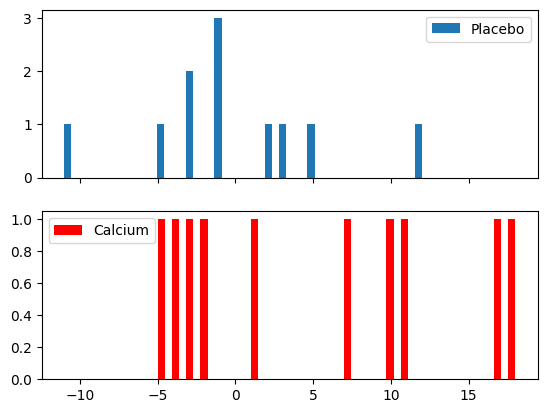

In [109]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.hist(df[df['Treatment'] == 'Placebo']['Decrease'], bins=50, label='Placebo')
ax1.legend()
ax2.hist(df[df['Treatment'] == 'Calcium']['Decrease'], bins=50, color='red', label='Calcium')
ax2.legend()

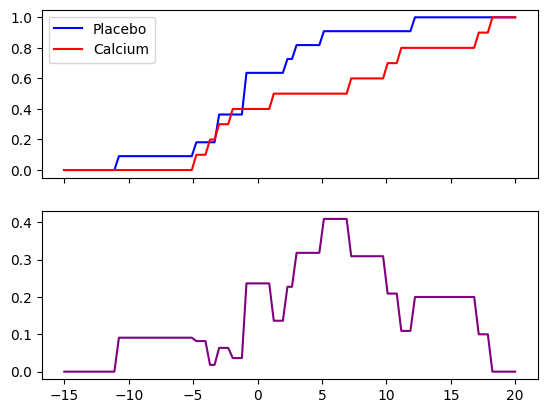

In [110]:
#2 sample Kolmogorov-Smirnov Test
X_1 = np.array(df[df['Treatment'] == 'Placebo']['Decrease'])
X_2 = np.array(df[df['Treatment'] == 'Calcium']['Decrease'])

def cdf(X, z):
  return np.sum(X < z) / len(X)

zz = np.linspace(-15, 20, 100)

fig, (ax1, ax2) = plt.subplots(2, sharex = True)
ax1.plot(zz, [cdf(X_1, z) for z in zz], color = 'blue', label = 'Placebo')
ax1.plot(zz, [cdf(X_2, z) for z in zz], color = 'red', label = 'Calcium')
ax1.legend()

ax2.plot(zz, [np.abs(cdf(X_1, z) - cdf(X_2, z)) for z in zz], color = 'purple')


In [111]:
D = np.max([np.abs(cdf(X_1, z) - cdf(X_2, z)) for z in zz])
n_1 = len(X_1)
n_2 = len(X_2)
stat = np.sqrt((n_1 * n_2) / (n_1 + n_2)) * D
stat

0.936281675898539

$$
\begin{align}
H(t) &= 1 - 2 \sum_{j=1}^\infty (-1)^{j-1} e^{-2j^2t^2}
\end{align}
$$

In [112]:
def H(t, tol=1e-5):
    s = 0.0
    j = 1

    while True:
      p_term = (-1) ** (j-1) * np.exp(- 2 * (j ** 2) * (t ** 2))
      s += p_term
      if np.abs(p_term) < tol:
        break
      j += 1

    return 1 - 2 * s
H(0.1)

5.462534308331435e-06

Text(0.5, 1.0, 'H(t)')

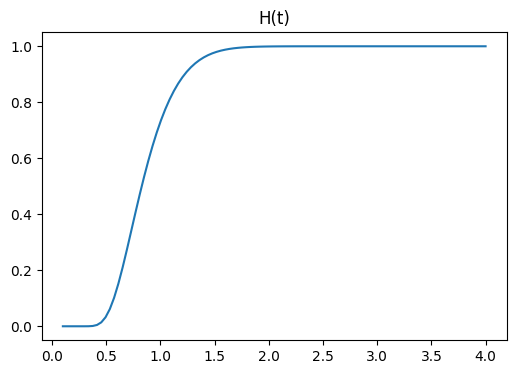

In [113]:
tt = np.linspace(0.1, 4, 100)
ht = [H(t) for t in tt]

plt.figure(figsize=(6, 4))
plt.plot(tt, ht)
plt.title('H(t)')


In [118]:
from scipy.optimize import minimize

def H_inv(q):
    def loss_function(t):
        return (H(t) - q)**2

    x0 = 1.0
    return minimize(loss_function, x0, method='nelder-mead').x
print(f'Test statistic: {stat}')
print(f'.95 confidence interval: {H_inv(0.95)[0]}')
print('Failed to reject the hypothesis')

Test statistic: 0.936281675898539
.95 confidence interval: 1.3581054687500012
Failed to reject the hypothesis
